In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

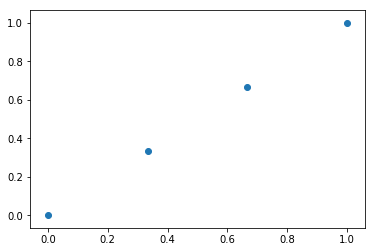

In [18]:
stepsize = 1/3
X_train = np.arange(0, 1+stepsize, stepsize).reshape(-1, 1)
y_train = X_train.copy()
plt.scatter(X_train.flatten(), y_train.flatten())
plt.show()

In [4]:
def print_status_bar(iteration, total, loss, metrics=None): 
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n" 
    print("\r{}/{} - ".format(iteration, total) + metrics, end=end)

In [80]:
n_epochs = 10
n_steps = 10
optimizer = keras.optimizers.Adam(lr=1e-3) 
loss_fn = keras.losses.mean_squared_error 
mean_loss = keras.metrics.Mean() 
metrics = [keras.metrics.MeanAbsoluteError()]

In [81]:
from tqdm import tqdm_notebook

In [100]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="elu", kernel_initializer='he_uniform', use_bias=True),
    keras.layers.Dense(100, activation="elu", kernel_initializer='he_uniform', use_bias=True),
    keras.layers.Dense(100, activation="elu", kernel_initializer='he_uniform', use_bias=True),
    keras.layers.Dense(100, activation="elu", kernel_initializer='he_uniform', use_bias=True),
    keras.layers.Dense(100, activation="elu", kernel_initializer='he_uniform', use_bias=True),
    keras.layers.Dense(1, use_bias=True)
])

reg_losses = []
jac_losses = []
for epoch in tqdm_notebook(list(range(1, n_epochs + 1))): 
    print("Epoch {}/{}".format(epoch, n_epochs)) 
    for step in range(1, n_steps + 1): 
        
        X_batch, y_batch = tf.Variable(X_train), y_train
        
        with tf.GradientTape() as jacobian_tape:
            
            with tf.GradientTape(persistent=True) as tape: 
                tape.watch(X_batch)
                y_pred = model(X_batch, training=True)
                reg_loss = tf.reduce_mean(loss_fn(y_batch, y_pred)) 
                reg_losses.append(float(reg_loss))

            jacobian = tape.gradient(y_pred, X_batch)
            print(jacobian)
            jacobian_loss = tf.scalar_mul(0.1, tf.reduce_sum(tf.sqrt(tf.square(jacobian))))
            jac_losses.append(float(jacobian_loss))
        
        reg_grad = tape.gradient(reg_loss, model.trainable_variables)
        jac_grad = jacobian_tape.gradient(jacobian_loss, model.trainable_variables)
        
        del tape
        
        optimizer.apply_gradients(zip(reg_grad, model.trainable_variables)) 
        optimizer.apply_gradients(zip(jac_grad, model.trainable_variables))

Epoch 1/10
tf.Tensor(
[[-10.80443483]
 [ -4.5200359 ]
 [ -2.86696303]
 [ -2.00258421]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[45.66060353]
 [ 9.64061245]
 [ 5.69478897]
 [ 4.3442673 ]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[24.90552433]
 [ 1.66164404]
 [ 0.82074907]
 [ 0.82296908]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 0.76681726]
 [-3.83162626]
 [-2.91152576]
 [-1.99175895]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-4.37910189]
 [-2.18410622]
 [-2.19424422]
 [-2.03777403]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 6.98966139]
 [ 1.43049636]
 [ 0.25394074]
 [-0.09558695]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[13.75516585]
 [ 2.73370057]
 [ 1.21295716]
 [ 0.75948513]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[0.7019936 ]
 [0.21560846]
 [0.17179516]
 [0.12907024]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-18.45035448]
 [ -2.39400098]
 [ -1.04181217]
 [ -0.35214609]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-18.73040128]
 [ -0.06650123]
 [  0.3923543 ]
 [  0.62

tf.Tensor(
[[9.36981823]
 [2.07993863]
 [2.9248678 ]
 [5.26504464]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-3.95595789]
 [-4.97244775]
 [-0.28679966]
 [ 2.98744995]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-2.79091782]
 [-3.05782521]
 [ 1.71990821]
 [ 4.28738691]], shape=(4, 1), dtype=float64)
Epoch 5/10
tf.Tensor(
[[6.4699432 ]
 [1.50392864]
 [5.08886834]
 [6.35217974]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[6.76454352]
 [0.82933703]
 [4.59916134]
 [6.03897231]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-0.08853294]
 [-1.96999029]
 [ 2.53042948]
 [ 5.06874007]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-3.45131668]
 [-3.10206068]
 [ 2.23965192]
 [ 4.98295703]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-0.94108291]
 [-2.26661371]
 [ 3.70241558]
 [ 5.87461986]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 4.88730542]
 [-0.57933473]
 [ 5.66723922]
 [ 7.20721248]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 8.96983509]
 [-0.84762488]
 [ 5.57969912]
 [ 7.55748344]], shape=(4, 

tf.Tensor(
[[-4.13298395]
 [ 2.27839422]
 [-4.11730178]
 [19.44756217]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 0.83653552]
 [ 2.54879185]
 [-5.67921295]
 [18.54994222]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 3.13180894]
 [ 2.12266277]
 [-8.52197583]
 [12.34559543]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 2.37261582]
 [ 1.44482137]
 [-9.88669759]
 [19.78590328]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[ 0.85609595]
 [ 1.38802797]
 [-6.27332062]
 [23.66474016]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-0.29368227]
 [ 2.81434374]
 [-8.03519399]
 [14.20534399]], shape=(4, 1), dtype=float64)
Epoch 9/10
tf.Tensor(
[[-1.71471452]
 [ 3.27260018]
 [-1.45536245]
 [ 8.21098771]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-2.10301376]
 [ 4.4893238 ]
 [-7.71644257]
 [23.9640771 ]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[-1.75802934]
 [ 4.05675188]
 [-9.24949895]
 [23.32500723]], shape=(4, 1), dtype=float64)
tf.Tensor(
[[  0.52002946]
 [  4.13969826]
 [-11.54162519]
 [  6.063432

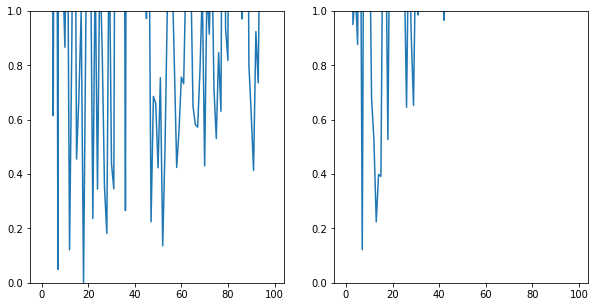

In [101]:
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(121)
plt.plot(reg_losses)
plt.ylim(0, 1)
fig.add_subplot(122)
plt.plot(jac_losses)
plt.ylim(0, 1)
plt.show()

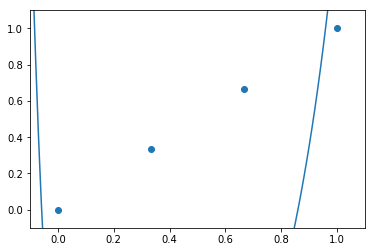

In [106]:
test_stepsize=0.01
X_test = np.arange(-1, 1+test_stepsize+1, test_stepsize).reshape(-1, 1)
y_test = X_test.copy()
plt.plot(X_test.flatten(), model.predict(X_test).flatten())
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.scatter(X_train.flatten(), y_train.flatten())
plt.show()

In [103]:
(model.predict(np.array([[0.25 + 1e-3]])) - model.predict(np.array([[0.25 - 1e-3]]))) / 2e-3

array([[1.27980966]])